## classify grayscale image of hand written 

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)
print(len(train_labels))
train_labels

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
print(test_images.shape)
print(len(test_labels))
test_labels

(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
train_images.ndim

3

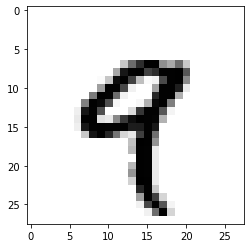

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
                          layers.Dense(512, activation = 'relu'),   #densely connected (fully connected)
                          layers.Dense(10, activation = 'softmax')  #10 way soft max classification layer
])

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"])

In [ ]:
#Convert all values to [0, 1] interval
train_images = train_images.reshape((60000, 28 * 28)) # return (60000, 784)
train_images = train_images.astype("float32") /255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") /255

In [ ]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2597 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1045 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0683 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0500 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0374 - accuracy: 0.9886


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([8.3556468e-09, 1.8174802e-10, 5.0465422e-07, 1.1256000e-03,
       6.9114943e-11, 1.6448146e-07, 3.3589906e-13, 9.9886972e-01,
       1.8678556e-06, 2.1744472e-06], dtype=float32)

Use agrmax & argmin to find which numbers have the highest and lowest probability that computers can interpret

In [ ]:
print(predictions[0].argmax())
print(predictions[0].argmin())

7
6


In [ ]:
# probability
print(predictions[0][7])
print(predictions[0][6])

0.9988697
3.3589906e-13


7 has the highest probability for computer to interpret this number, but 6 has the lowest probability.

In [ ]:
#check with test data
test_labels[0]

7

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.9747
test_acc: 0.9746999740600586


In [ ]:
# rank-0 tensor (Scalar)
import numpy as np
x = np.array(12)
x.ndim

0

In [ ]:
# rank-1 tensor (Vector)
x = np.array([12, 3, 6, 14, 7]) # 5 dimensional vectors
x.ndim

1

In [ ]:
# rank-2 tensor (Matrices)
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]) 
x.ndim

2

In [ ]:
# rank-3 tensor 
x = np.array([[[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]]) 
x.ndim

3